In [1]:
import pandas as pd

df = pd.read_csv('/Users/aoamacsplace/Documents/mosaic/Aave/token/data_copy.csv')


In [2]:


df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='s')
df = df.rename(columns={'time_stamp': 'DateTime'})
value_intervals = [(0, 1), (1, 10), (10, 100), (100, 1000), (1000, 10000), (10000, float('inf'))]
value_scores = [10, 25, 40, 55, 70, 100]
time_intervals = [(0, 30), (30, 90), (90, 180), (180, 365), (365, float('inf'))]
time_scores = [10, 30, 50, 70, 100]
def calculate_score(value, intervals, scores):
    for index, (start, end) in enumerate(intervals):
        if start <= value < end:
            return scores[index]
   return scores[-1]
deposit_df, deposit_time_df, borrow_df, borrow_time_df, repayment_df = [], [], [], [], []
for address, group_data in df.groupby('From'):
    methods = group_data['Method'].unique()
    for method in methods:
        if 'depositETH' in method:
            value_in_eth = group_data['value'].sum()
            deposit_value_score = calculate_score(value_in_eth, value_intervals, value_scores)
            deposit_df.append({'Address': address, 'value': value_in_eth, 'Deposit Value Score': deposit_value_score})
            days_since_deposit = (pd.Timestamp.now() - pd.to_datetime(group_data['DateTime'])).dt.days
            deposit_time_score = calculate_score(days_since_deposit.iloc[0], time_intervals, time_scores)
            deposit_time_df.append({'Address': address, 'DateTime': group_data['DateTime'].iloc[0], 'Deposit Time Score': deposit_time_score})
        elif 'borrowETH' in method:
            value_out_eth = group_data['value'].sum()
            borrow_value_score = calculate_score(value_out_eth, value_intervals, value_scores)
            borrow_df.append({'Address': address, 'value': value_out_eth, 'Borrow Value Score': borrow_value_score})
            days_since_borrow = (pd.Timestamp.now() - pd.to_datetime(group_data['DateTime'])).dt.days
            borrow_time_score = calculate_score(days_since_borrow.iloc[0], time_intervals, time_scores)

            borrow_time_df.append({'Address': address, 'DateTime': group_data['DateTime'].iloc[0], 'Borrow Time Score': borrow_time_score})
        elif 'repayETH' in method:
            value_in_eth = group_data['value'].sum()
            repayment_value_score = calculate_score(value_in_eth, value_intervals, value_scores)
            repayment_df.append({'Address': address, 'value': value_in_eth, 'Repayment Value Score': repayment_value_score})
deposit_na_intervals = [(0, 1), (1, 2), (2, 3), (3, 10), (10, float('inf'))]
deposit_na_scores = [10, 30, 50, 70, 100]
def calculate_score(value, intervals, scores):
    for index, (start, end) in enumerate(intervals):
        if start <= value < end:
            return scores[index]
    return scores[-1]
deposit_na_data = []
for address, group_data in df.groupby('From'):
    methods = group_data['Method'].unique()
    for method in methods:
        if 'depositETH' in method:
            deposit_na_count = group_data['token_name'].nunique()
            deposit_na_score = calculate_score(deposit_na_count, deposit_na_intervals, deposit_na_scores)

            deposit_na_data.append({'Address': address, 'Deposit Token Score': deposit_na_score})
deposit_na_df = pd.DataFrame(deposit_na_data)
borrow_na_intervals = [(0, 1), (1, 2), (2, 3), (3, 10), (10, float('inf'))]
borrow_na_scores = [10, 30, 50, 70, 100]
def calculate_score(value, intervals, scores):
    for index, (start, end) in enumerate(intervals):
        if start <= value < end:
            return scores[index]
    return scores[-1]


borrow_na_data = []

for address, group_data in df.groupby('From'):
    methods = group_data['Method'].unique()
    for method in methods:
        if 'borrowETH' in method:
            borrow_na_count = group_data['token_name'].nunique()
            borrow_na_score = calculate_score(borrow_na_count, borrow_na_intervals, borrow_na_scores)

            borrow_na_data.append({'Address': address, 'Borrow Token Score': borrow_na_score})

borrow_na_df = pd.DataFrame(borrow_na_data)
repay_na_intervals = [(0, 1), (1, 2), (2, 3), (3, 10), (10, float('inf'))]
repay_na_scores = [10, 30, 50, 70, 100]
def calculate_score(value, intervals, scores):
    for index, (start, end) in enumerate(intervals):
        if start <= value < end:
            return scores[index]
    return scores[-1]

repay_na_data = []

for address, group_data in df.groupby('From'):
    methods = group_data['Method'].unique()
    for method in methods:
        if 'repayETH' in method:
            repay_na_count = group_data['token_name'].nunique()
            repay_na_score = calculate_score(repay_na_count, repay_na_intervals, repay_na_scores)

            repay_na_data.append({'Address': address, 'Repayment Token Score': repay_na_score})


repay_na_df = pd.DataFrame(repay_na_data)


deposit_df = pd.DataFrame(deposit_df)
deposit_time_df = pd.DataFrame(deposit_time_df)
borrow_df = pd.DataFrame(borrow_df)
borrow_time_df = pd.DataFrame(borrow_time_df)
repayment_df = pd.DataFrame(repayment_df)


merged_df = deposit_time_df.merge(deposit_df, on='Address', how='outer')
merged_df = merged_df.merge(borrow_time_df, on='Address', how='outer')
merged_df = merged_df.merge(borrow_df, on='Address', how='outer')
merged_df = merged_df.merge(repayment_df, on='Address', how='outer')
merged_df = merged_df.merge(borrow_na_df, on='Address', how='outer')
merged_df = merged_df.merge(deposit_na_df, on='Address', how='outer')
merged_df = merged_df.merge(repay_na_df, on='Address', how='outer')

merged_df = merged_df.fillna(0)
merged_df.drop(columns = {'DateTime_x','value', 'DateTime_y', 'value_y'}, inplace = True)
merged_df = merged_df.rename(columns={'value_x': 'Value_in_ETH'})

In [3]:

merged_df['LP Score'] = merged_df.loc[:, 'Deposit Time Score':'Repayment Token Score'].sum(axis=1)
merged_df['LP Reward'] = (merged_df['LP Score']/800) *100
print("LP Model:")
merged_df.head()

LP Model:


,Address,Deposit Time Score,Value_in_ETH,Deposit Value Score,Borrow Time Score,Borrow Value Score,Repayment Value Score,Borrow Token Score,Deposit Token Score,Repayment Token Score,LP Score,LP Reward
0,0x00000001b01122945d67cf7c972f1a2063ca4008,70.0,0.900037,10.0,0.0,0.0,0.0,0.0,50.0,0.0,130.900037,16.362505
1,0x00000009d94baf057697d988d2e3eec2fce81162,70.0,0.200041,10.0,0.0,0.0,0.0,0.0,50.0,0.0,130.200041,16.275005
2,0x0000000a5d2afc64886a80780bc5ca6ecc519181,70.0,0.300027,10.0,0.0,0.0,0.0,0.0,50.0,0.0,130.300027,16.287503
3,0x0000000f3a9e446d0a6f976df5f0ed1b324dcd0e,70.0,0.200032,10.0,0.0,0.0,0.0,0.0,50.0,0.0,130.200032,16.275004
4,0x00000015e180b01c40b881e10774bc784bb6f4eb,70.0,0.100000,10.0,0.0,0.0,0.0,0.0,30.0,0.0,110.100000,13.762500


In [5]:
merged_df.columns

Index(['Address', 'Deposit Time Score', 'Value_in_ETH', 'Deposit Value Score',
       'Borrow Time Score', 'Borrow Value Score', 'Repayment Value Score',
       'Borrow Token Score', 'Deposit Token Score', 'Repayment Token Score',
       'LP Score', 'LP Reward'],
      dtype='object')

**RUDIMENTARY ANALYSIS**


Distribution of Scores:

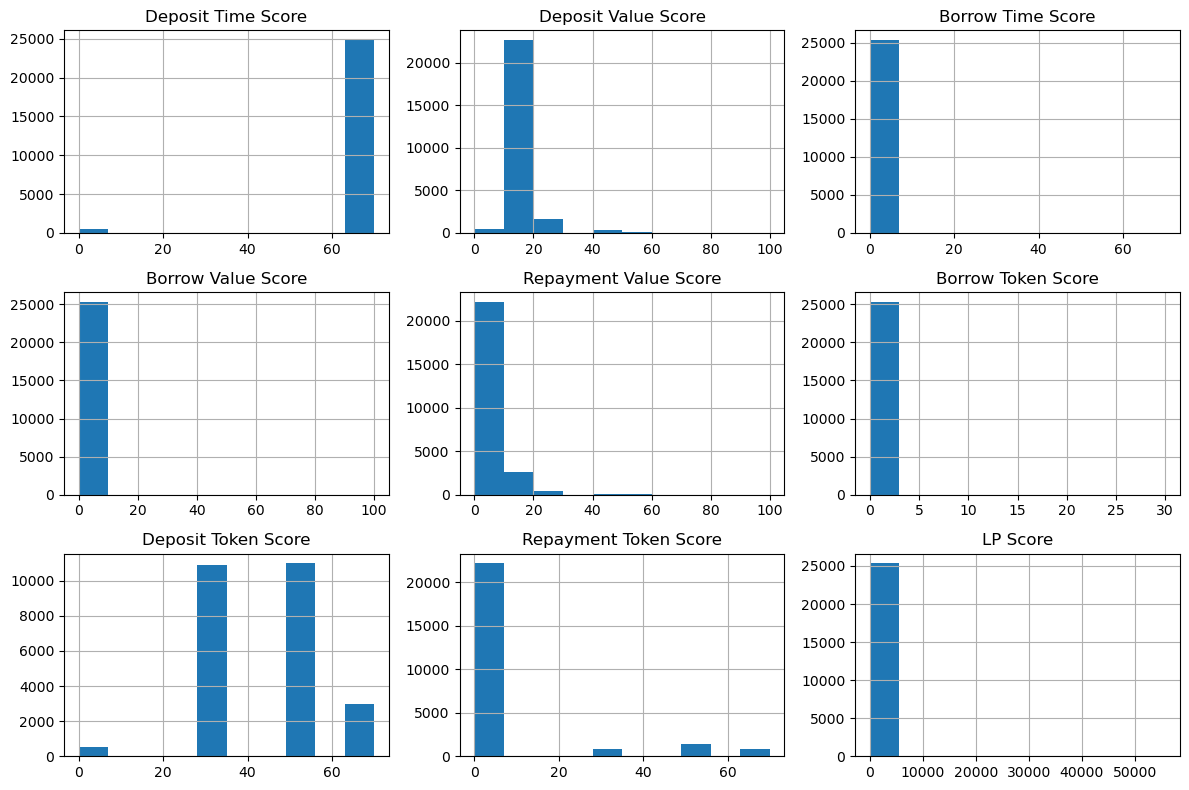

In [6]:
import matplotlib.pyplot as plt

scores_columns = ['Deposit Time Score', 'Deposit Value Score', 'Borrow Time Score', 
                  'Borrow Value Score', 'Repayment Value Score', 'Borrow Token Score', 
                  'Deposit Token Score', 'Repayment Token Score', 'LP Score']

merged_df[scores_columns].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


 Correlation Analysis:

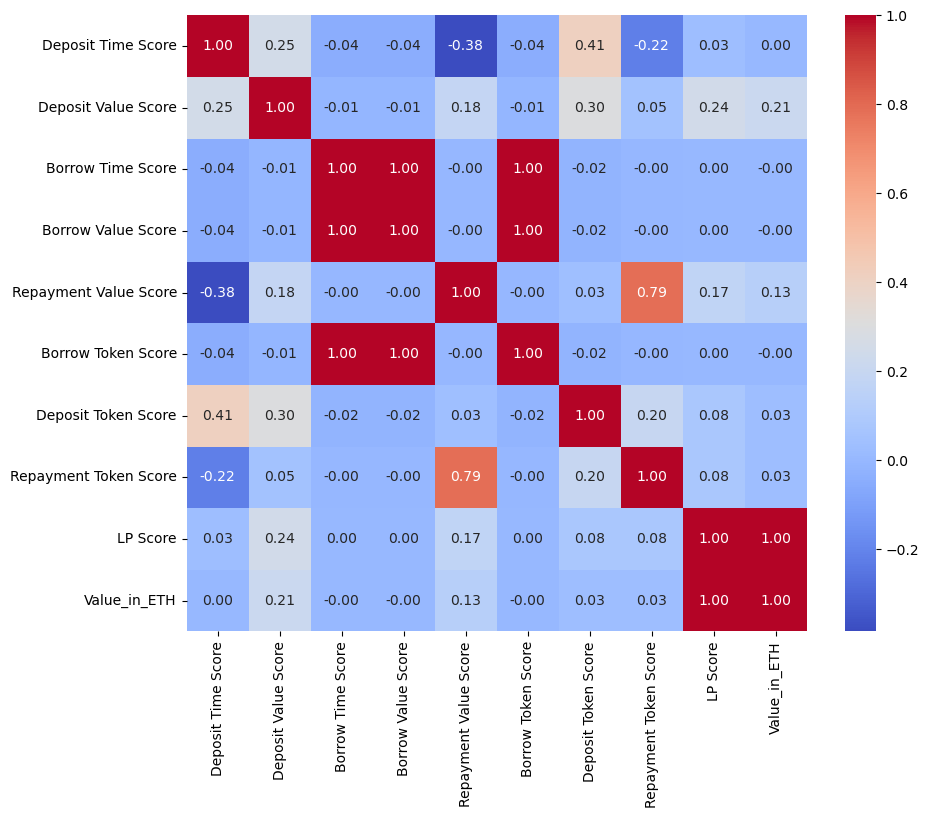

In [7]:
import seaborn as sns

correlation_df = merged_df[scores_columns + ['Value_in_ETH']]
correlation_matrix = correlation_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


LP Reward distribution:

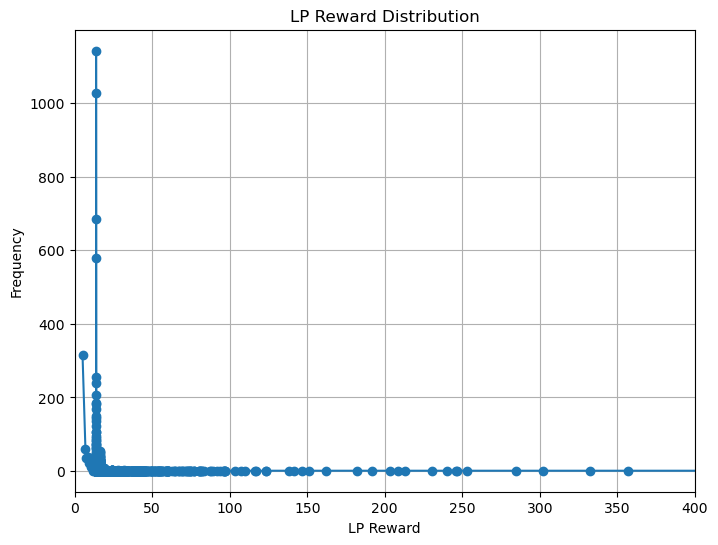

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(merged_df['LP Reward'].value_counts().sort_index().index, merged_df['LP Reward'].value_counts().sort_index().values, marker='o')
plt.xlabel('LP Reward')
plt.ylabel('Frequency')
plt.title('LP Reward Distribution')
plt.xlim(0, 400)  
plt.grid(True)
plt.show()


Token Score comparison:

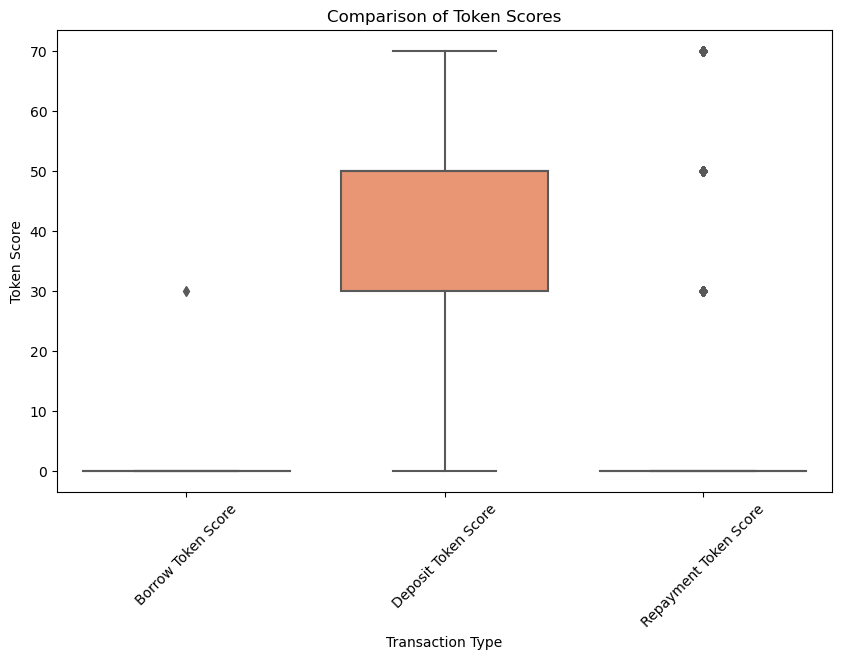

In [12]:
token_scores_df = merged_df[['Borrow Token Score', 'Deposit Token Score', 'Repayment Token Score']]

plt.figure(figsize=(10, 6))
sns.boxplot(data=token_scores_df, palette='Set2')
plt.xlabel('Transaction Type')
plt.ylabel('Token Score')
plt.title('Comparison of Token Scores')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from skmultiflow.drift_detection import DDM
from sklearn.neural_network import MLPClassifier
import pandas as pd

def run_ddm_with_mlp_and_relu():
    dataset_filename = "synthetic_data.csv"
    data = pd.read_csv(dataset_filename)
    
    X = data.drop(columns=['is_fraud'])
    y = data['is_fraud']
    buffer_size = 10
    buffer_data = []  
    
    ddm_detector = DDM()
    
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', random_state=42)
    
    for index, row in data.iterrows():
        X_instance = row.drop(['is_fraud'])
        y_instance = row['is_fraud']
        
        ddm_detector.add_element(y_instance)
        
        mlp_prediction = mlp_classifier.predict([X_instance])[0]
        mlp_classifier.partial_fit([X_instance], [y_instance], classes=[0, 1])
        
        if ddm_detector.detected_change():
            print(f"Concept drift detected at index {index}")
            # Send data batch directly to AAWE module
            print("Sending data batch to AAWE")
            
        else:
            buffer_data.append((X_instance, y_instance))
            
            if len(buffer_data) >= buffer_size:
                print("Sending buffered data to AAWE")
                buffer_data = []  # Clear the buffer

run_ddm_with_mlp_and_relu()
